Saved ensemble_mean_plot_fut.png


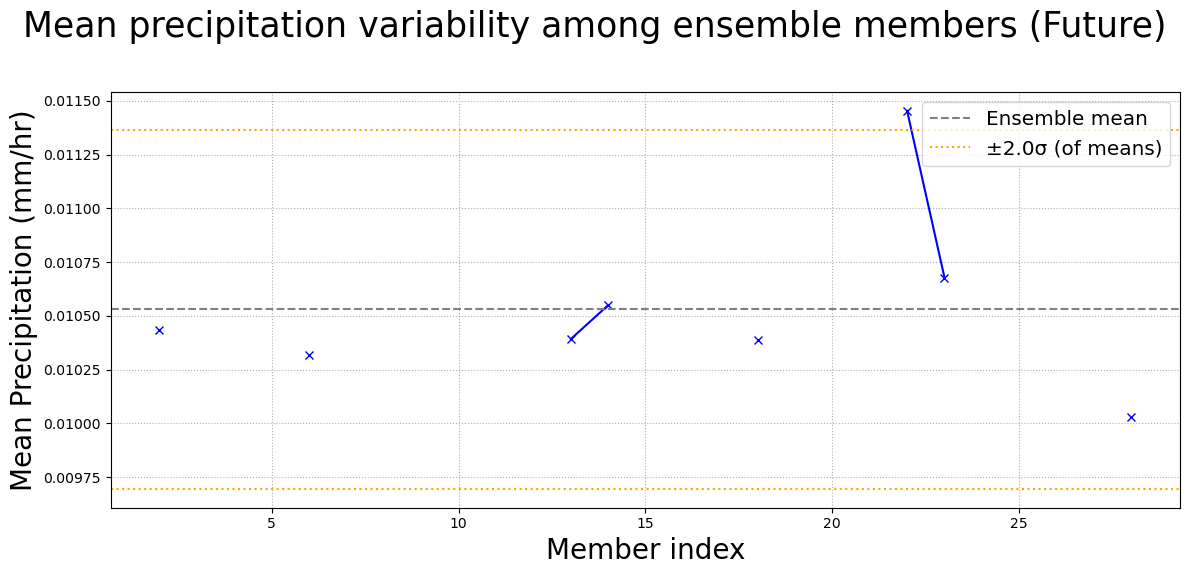

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import io
import os 

# --- 1. Load Your Data ---
# This script assumes 'ensemble_member_stats_hist.csv' exists
# in the same directory.
try:
    df = pd.read_csv('ensemble_member_stats_hist_new.csv')
except FileNotFoundError:
    print("Error: 'ensemble_member_stats_hist.csv' not found.")
    print("Please make sure the file is in the same directory as the script.")
    # Create a dummy dataframe to allow script to run without error for syntax checking
    df = pd.DataFrame({
        'member': ['pp_ens_01', 'pp_ens_02'],
        'mean': [1, 2],
        'std_dev': [0.1, 0.2]
    })
    # In a real-world scenario, you might want to exit here
    # import sys
    # sys.exit(1)


# --- 2. Data Preprocessing & Statistics ---

# Extract member index number for plotting
if 'member' in df.columns:
    df['member_index'] = df['member'].str.split('_').str[-1].astype(int)
    df = df.sort_values('member_index').reset_index(drop=True)
else:
    # Handle case where file wasn't loaded
    df['member_index'] = df.index

# Calculate the four key ensemble statistics
mean_of_means = df['mean'].mean()
std_of_means = df['mean'].std()
mean_of_stds = df['std_dev'].mean()
std_of_stds = df['std_dev'].std()

# Calculate Z-scores for each member's mean and std_dev
df['mean_z'] = (df['mean'] - mean_of_means) / std_of_means
df['std_z'] = (df['std_dev'] - mean_of_stds) / std_of_stds

# --- 3. Plot 1: Ensemble Mean per Member ---

# Define the threshold (in Z-score) for flagging a member
# We still define this, as it's used for the orange threshold lines
HEALTH_THRESHOLD_Z = 2.0 

# Create the figure and *one* subplot
fig, ax1 = plt.subplots(1, 1, figsize=(12, 6))
fig.suptitle('Mean precipitation variability among ensemble members (Future)', fontsize=25)

## --- Main Plot: Mean per Member ---
ax1.set_xlabel('Member index', fontsize=20)
ax1.set_ylabel('Mean Precipitation (mm/hr)', fontsize=20)

# --- MODIFICATION ---
# Instead of plotting normal, biased, and unbiased members separately,
# we now plot ALL members using the 'normal' style ('o-' in grey).
# This single line replaces the three previous ax1.plot calls.
ax1.plot(df['member_index'], df['mean'], 'x-', color='blue', label='_nolegend_')
# --- END MODIFICATION ---


# Plot ensemble mean line
ax1.axhline(mean_of_means, color='grey', linestyle='--', label='Ensemble mean')

# Plot threshold lines
threshold_line_color = 'orange'
ax1.axhline(mean_of_means + HEALTH_THRESHOLD_Z * std_of_means, color=threshold_line_color, linestyle=':', 
            label=f'±{HEALTH_THRESHOLD_Z}σ (of means)')
ax1.axhline(mean_of_means - HEALTH_THRESHOLD_Z * std_of_means, color=threshold_line_color, linestyle=':',
            label='_nolegend_')

ax1.legend(fontsize='x-large')
ax1.grid(True, linestyle=':')

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust for main title

# Only save if we loaded the real file
if 'member' in df.columns and df['member_index'].iloc[0] == 1:
    plt.savefig("ensemble_mean_plot_fut.png")
    print("Saved ensemble_mean_plot_fut.png")
else:
    print("Plot generated, but not saved (using dummy data).")

# plt.show() # Use plt.show() to display interactively